# Speaker Diarization and Automatic Speech Recognition

> Diarization: Using Pyannote


>Speech-to-Text: Using openai whisper-large v-3





## Introduction
**Purpose**: This code performs speaker diarization and maps the speech to text using pyannote for diarization and the large-v3 Whisper model for speech-to-text conversion.

**Overview**: The code processes audio files to identify different speakers and transcribe their spoken content into text.



## Setup and Installation
**Prerequisites**:
- Python
- pyannote.audio
- openai-whisper
- Pipeline
- whisper
- List of required libraries: librosa, pydub, ffmpeg, SpeechRecognnition

**Version:**

SpeechRecognition==3.10.4

pyannote.audio==3.2.0

Pipeline==7.2.2

ffmpeg==3.4.13

pydub==0.25.1


In [ ]:
!pip install openai-whisper pyannote.audio ffmpeg langdetect pydub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 610.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4

In [ ]:
!pip install Pipeline whisper SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 13.6 MB/s eta 0:00:00
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=23bf49a4338b71daaada21adbed5d505c0d44916e261f9d6c59b966de076e59a
  Stored in directory: /root/.cache/pip/wheels/aa/7c/1d/015619716e2facae6631312503baf3c3220e6a9a3508cb14b6
Successfully built whisper


Import the necessary libraries:

In [ ]:
import os
from pydub import AudioSegment
import librosa
import numpy as np
from pyannote.audio import Pipeline
from pyannote.core import Segment, Annotation

In [ ]:
!pip install pydub
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# This gives different tasks available for pyannote pipeline
from huggingface_hub import HfApi
available_pipelines = [p.modelId for p in HfApi().list_models(filter="pyannote-audio-pipeline")]
list(filter(lambda p: p.startswith("pyannote/"), available_pipelines))

['pyannote/overlapped-speech-detection',
 'pyannote/speaker-diarization',
 'pyannote/speaker-segmentation',
 'pyannote/voice-activity-detection',
 'pyannote/speaker-diarization-3.0',
 'pyannote/speaker-diarization-3.1']



---



**Audio file format conversion**

This is to convert any form of Audio into .wav format using pydub library which is required for the model used.


In [ ]:
# Convert the uploaded file to WAV
from pydub import AudioSegment

# Define the path to the input and output files
input_file = 'conversation1.mpeg'
output_file = 'conversation1.wav'

audio = AudioSegment.from_file(input_file)
audio.export(output_file, format="wav")

print(f"File has been converted to WAV and saved as {output_file}")

# # Download the converted file
# from google.colab import files
# files.download(AUDIO_FILE)

File has been converted to WAV and saved as conversation1.wav


**Load the Audio File Using Librosa**

We will load the WAV file using the librosa library to check the number of audio samples.

In [ ]:
AUDIO_FILE = "conversation2.wav"


In [ ]:
import librosa

audio, sr = librosa.load(output_file, sr=16000)
num_samples = len(audio)

print("Number of samples:", num_samples)


Number of samples: 1267253


**Visualization: Load the Audio File and Plot the Waveform**

We will load the audio file using librosa and plot the waveform to visualize the audio data.

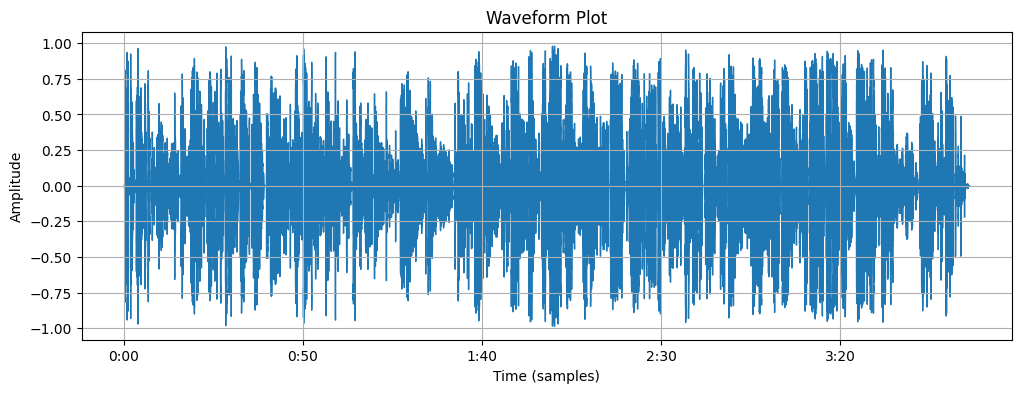

In [ ]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

y, sr = librosa.load(AUDIO_FILE )

plt.figure(figsize=(12, 4))
data, sample_rate = librosa.load(AUDIO_FILE )
librosa.display.waveshow(data, sr=sample_rate)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Waveform Plot")
plt.grid(True)
plt.show()




**Play the Audio File:**

Additionally, we can play the audio file within the notebook to listen to its content using IPython.display

In [ ]:
import IPython.display as ipd
ipd.Audio(AUDIO_FILE)


**Calculate the Duration of the Audio File:**

This code is to calculate and print the duration of the audio file using librosa.

In [ ]:
audio_duration = librosa.get_duration(y=y, sr=sr)
print(f"Audio duration: {audio_duration:.2f} seconds")

Audio duration: 236.05 seconds


In [ ]:
output_file

'conversation2.wav'



---



# PYANNOTE Installation for Speaker Diarization Information

We will use the pyannote.audio library to perform speaker diarization on the audio file. This process will identify different speakers and segment the audio accordingly.

In [ ]:
from google.colab import userdata
Huggingface_pyyanote_TOKEN=userdata.get("pyyanote_diarization")

In [ ]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained(
    "pyannote/speaker-diarization-3.1",
    use_auth_token=Huggingface_pyyanote_TOKEN)

config.yaml:   0%|          | 0.00/469 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.91M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/399 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/26.6M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/221 [00:00<?, ?B/s]

This initializes the speaker diarization pipeline using the specified pre-trained model.

Pipeline.from_pretrained:

- "pyannote/speaker-diarization-3.1": Specifies the pre-trained model to use for speaker diarization.
- use_auth_token: This parameter requires an authentication token to access the pre-trained model. This "Huggingface_pyyanote_TOKEN" is the actual Hugging Face authentication token with granted access.

In [ ]:
combined_annotation = pipeline(AUDIO_FILE, num_speakers=2)



This processes the audio file and performs speaker diarization and store it in "combined_annotation" variable.

pipeline(AUDIO_FILE, num_speakers=2):

- AUDIO_FILE: The path to the audio file to be processed.
- num_speakers: The estimated number of speakers in the audio file. Adjust this number based on your specific audio data.



**Print the Diarization Results:**

In [ ]:
for turn, _, speaker in combined_annotation.itertracks(yield_label=True):
    print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")

start=0.0s stop=0.2s speaker_SPEAKER_01
start=1.3s stop=5.2s speaker_SPEAKER_01
start=5.9s stop=10.9s speaker_SPEAKER_00
start=11.0s stop=11.0s speaker_SPEAKER_00
start=11.1s stop=13.5s speaker_SPEAKER_00
start=14.0s stop=15.3s speaker_SPEAKER_00
start=16.0s stop=16.5s speaker_SPEAKER_00
start=17.2s stop=19.0s speaker_SPEAKER_01
start=19.4s stop=20.0s speaker_SPEAKER_00
start=20.3s stop=21.8s speaker_SPEAKER_00
start=22.1s stop=28.3s speaker_SPEAKER_00
start=28.6s stop=30.6s speaker_SPEAKER_01




This iterates over the diarization results(combined_annotation) and prints the start and stop times of each speech segment, along with the identified speaker label.


---


# Whisper Model (openai/whisper-large-v3) Installation for Speech recognition.


**Load and Prepare Whisper Model for Speech-to-Text**

We will use the transformers library to load and prepare the Whisper model for automatic speech recognition (ASR). This model will convert the spoken content of the audio file into text.

In [ ]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline

# Determine the device to use (GPU if available, otherwise CPU)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

# Specify the model ID for the Whisper model
model_id = "openai/whisper-large-v3"

# Load the pre-trained Whisper model
model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, use_safetensors=True
)
model.to(device)



config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(128, 1280, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(1280, 1280, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 1280)
      (layers): ModuleList(
        (0-31): 32 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=1280, out_features=1280, bias=False)
            (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (fc2): Linear(in_features=5120, out_features=1280, bia

**AutoModelForSpeechSeq2Seq.from_pretrained:** This loads the pre-trained Whisper model and moves it to the specified device.

- model_id: Specifies the pre-trained model ID to load, which in this case is "openai/whisper-large-v3".

- torch_dtype: Specifies the data type for the model, using torch.float16 if a GPU is available, otherwise torch.float32.

- use_safetensors: Enables the use of safetensors for model loading.


In [ ]:
# Load the processor for the Whisper model
processor = AutoProcessor.from_pretrained(model_id)

# Create an ASR pipeline
pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    max_new_tokens=128,
    chunk_length_s=30,
    batch_size=16,
    return_timestamps=True,


    torch_dtype=torch_dtype,
    device=device,
)



preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


1. **AutoProcessor.from_pretrained**:
This loads the processor associated with the Whisper model, which includes the tokenizer and feature extractor.
- model_id: Specifies the pre-trained processor ID to load, which matches the model ID.




2. **pipeline:** This creates an ASR pipeline for processing audio files, using the loaded model and processor components.
- "automatic-speech-recognition": Specifies the task type for the pipeline, which is automatic speech recognition (ASR).
- model: The pre-trained Whisper model loaded earlier.
- tokenizer: The tokenizer component of the processor.
- feature_extractor: The feature extractor component of the processor.
- max_new_tokens: Maximum number of new tokens to generate during transcription.
- chunk_length_s: Length of audio chunks in seconds to process at a time.
- batch_size: Number of audio chunks to process in parallel.
- return_timestamps: Whether to return timestamps for the transcriptions.
- torch_dtype: Specifies the data type for the pipeline, using torch.float16 if a GPU is available, otherwise torch.float32.
- device: Specifies the device to run the pipeline on (GPU or CPU)

**Transcribe the Audio File**

We will use the ASR pipeline created earlier to transcribe the audio file. The transcription process will convert the spoken content into text and include timestamps for each segment.

In [ ]:
# Transcribe the audio file using the ASR pipeline
transcription_result  = pipe(AUDIO_FILE, return_timestamps=True , generate_kwargs={"language": "english", "task": "translate"})




- AUDIO_FILE: The path to the audio file to be transcribed.
- return_timestamps: When set to True, the transcription will include timestamps for each segment of the spoken content.
- generate_kwargs: Additional arguments for the transcription generation.
- language: Specifies the language of the audio content, set to "english" in this case.
- task: Specifies the task for the ASR model, set to "translate" or "transcribe" for translating and transcribing the audio accordingly.



---



**Extract Segments Based on Diarization Results**


We will define a function to extract segments from the audio file based on the speaker diarization results. Each segment will correspond to a portion of the audio where a single speaker is talking.

In [ ]:

def extract_segments(audio_file, diarization):
    audio = AudioSegment.from_wav(audio_file)
    segments = []
    for turn, _, speaker in diarization.itertracks(yield_label=True):
        start_ms = turn.start * 1000
        end_ms = turn.end * 1000
        segment = audio[start_ms:end_ms]
        segments.append((segment, speaker, turn.start, turn.end))
    return segments

**Explanation of Parameters and Logic:**

- audio_file: The path to the audio file.
- diarization: The diarization result containing speaker segments.
- audio: The loaded audio file using pydub.
- segments: A list to store the extracted segments.
- turn: The time segment where a single speaker is talking.
- speaker: The speaker label.
- start_ms: The start time of the segment in milliseconds.
- end_ms: The end time of the segment in milliseconds.

- segment: The extracted audio segment corresponding to the current turn.

The function iterates over each turn in the diarization result, extracts the corresponding audio segment, and stores it in the segments list along with the speaker label and time information.

**Transcribe Segments Using Whisper**

We will define a function to transcribe each extracted segment using the Whisper model. The transcriptions will include speaker and time information.

In [ ]:

def transcribe_segments(segments):
    transcriptions = []
    for segment, speaker, start, end in segments:
        # Save the segment to a temporary file
        segment.export("temp_segment.wav", format="wav")

        # Transcribe the segment using Whisper
        transcription = pipe("temp_segment.wav", return_timestamps=True , generate_kwargs={"language": "english", "task": "translate"})

        # Store the transcription with the speaker and time information
        transcriptions.append({
            "speaker": speaker,
            "start": start,
            "end": end,
            "transcription": transcription["text"]
        })

        # Remove the temporary file
        os.remove("temp_segment.wav")

    return transcriptions

- segments: The list of extracted segments.
- transcriptions: A list to store the transcriptions.
- segment: An individual audio segment.
- speaker: The speaker label for the segment.
- start: The start time of the segment.
- end: The end time of the segment.
- transcription: The result of transcribing the segment using the Whisper model.

The function iterates over each segment, saves it to a temporary file, transcribes the segment using the Whisper model, stores the transcription along with speaker and time information, and removes the temporary file.

---


**Extract and Transcribe Segments**

We will use the functions defined above to extract and transcribe segments from the audio file.

In [ ]:
# Extract segments based on diarization results
extracted_segments = extract_segments(AUDIO_FILE, combined_annotation)


- extracted_segments: The list of segments extracted from the audio file based on diarization results.
- transcriptions: The list of transcriptions for the extracted segments.

The code extracts segments from the audio file, transcribes each segment using the Whisper model, and prints the transcriptions along with the speaker and time information.



In [ ]:
# Transcribe the extracted segments
transcriptions = transcribe_segments(extracted_segments)

# Print the transcriptions
for t in transcriptions:
    print(f"{t['speaker']} from [{round(t['start'], 4)} - {round(t['end'], 4)}]: {t['transcription']}")



SPEAKER_01 from [0.1322 - 0.4191]:  Hello.
SPEAKER_00 from [0.4191 - 0.4866]:  you
SPEAKER_01 from [0.4866 - 0.6047]:  Thank you.
SPEAKER_01 from [0.841 - 1.0266]:  Hello.
SPEAKER_00 from [1.0266 - 1.0435]:  you
SPEAKER_01 from [1.0435 - 1.2291]:  So...
SPEAKER_00 from [1.9547 - 2.5285]:  Yes.
SPEAKER_01 from [2.1066 - 2.5791]:  Yes.
SPEAKER_00 from [2.866 - 2.8828]:  you
SPEAKER_01 from [2.8828 - 4.7897]:  I think we need some digiprograms.
SPEAKER_00 from [5.2116 - 6.5785]:  Yes, yes, Puneet, how are you?
SPEAKER_01 from [6.5785 - 8.6372]:  Hey, I'm Gordon. How are you doing?
SPEAKER_00 from [8.0635 - 9.1097]:  I'm
SPEAKER_00 from [9.4303 - 11.7085]:  So sorry I was not able to respond to you.
SPEAKER_01 from [11.9278 - 12.6028]:  Okay.
SPEAKER_00 from [12.4341 - 12.8053]:  Oh.
SPEAKER_00 from [13.0585 - 16.6697]:  Little in the middle of something also today
SPEAKER_01 from [16.8216 - 17.176]:  Okay.
SPEAKER_00 from [18.0028 - 20.9728]:  Can we speak on Friday?
SPEAKER_01 from [20.9



---



This function extracts audio segments from the audio file based on the speaker diarization results. An overlap parameter is included to extend the segments slightly before and after the detected speaker times.
- overlap: The overlap duration (in seconds) to extend the segments slightly before and after the detected speaker times.

Alternative of above code

In [ ]:
# Function to extract audio segments based on diarization results
def extract_segments(audio_file, diarization, overlap=0.5):
    audio = AudioSegment.from_wav(audio_file)
    segments = []
    for turn, _, speaker in diarization.itertracks(yield_label=True):
        start_ms = max(0, turn.start * 1000 - overlap * 1000)
        end_ms = min(len(audio), turn.end * 1000 + overlap * 1000)
        segment = audio[start_ms:end_ms]
        segments.append((segment, speaker, turn.start, turn.end))
    return segments

    # Function to transcribe audio segments
def transcribe_segments(segments, pipe):
    transcriptions = []
    for segment, speaker, start, end in segments:
        # Save the segment to a temporary file
        segment.export("temp_segment.wav", format="wav")

        # Transcribe the segment using the Whisper pipeline
        # transcription = pipe("temp_segment.wav", generate_kwargs={"language": "english"})
        transcription = pipe("temp_segment.wav", return_timestamps=True ,generate_kwargs={"language": "english", "task": "translate"})

        # Store the transcription with the speaker and time information
        transcriptions.append({
            "speaker": speaker,
            "start": start,
            "end": end,
            "transcription": transcription["text"]
        })

        # Remove the temporary file
        os.remove("temp_segment.wav")

    return transcriptions



In [ ]:
# Extract segments based on diarization results
extracted_segments = extract_segments(AUDIO_FILE, combined_annotation)


In [ ]:
#overlap

# Transcribe each segment using Whisper
transcriptions = transcribe_segments(extracted_segments,pipe)

for t in transcriptions:
    print(f"{t['speaker']} from [{round(t['start'], 4)} - {round(t['end'], 4)}]: {t['transcription']}")



SPEAKER_01 from [0.1322 - 0.4191]:  Hello.
SPEAKER_00 from [0.4191 - 0.4866]:  Hello.
SPEAKER_01 from [0.4866 - 0.6047]:  Hello. Hello.
SPEAKER_01 from [0.841 - 1.0266]:  Hello. Hello.
SPEAKER_00 from [1.0266 - 1.0435]:  Hello.
SPEAKER_01 from [1.0435 - 1.2291]:  Hello.
SPEAKER_00 from [1.9547 - 2.5285]:  Yes.
SPEAKER_01 from [2.1066 - 2.5791]:  Yes.
SPEAKER_00 from [2.866 - 2.8828]:  Hi.
SPEAKER_01 from [2.8828 - 4.7897]:  Hi. Hi. We need some BG products.
SPEAKER_00 from [5.2116 - 6.5785]:  Yes, yes, Puneet. How are you? Hey, how are they?
SPEAKER_01 from [6.5785 - 8.6372]:  How are you? Hey, I'm good.
SPEAKER_00 from [8.0635 - 9.1097]:  I'm Gordon Howell, executive director.
SPEAKER_00 from [9.4303 - 11.7085]:  I'm so sorry I was not able to respond to you.
SPEAKER_01 from [11.9278 - 12.6028]:  Yeah, no.
SPEAKER_00 from [12.4341 - 12.8053]:  No.
SPEAKER_00 from [13.0585 - 16.6697]:  Little in the middle of something also today.
SPEAKER_01 from [16.8216 - 17.176]:  Today? Okay.
SPEAK

In [ ]:
#overlap

# Transcribe each segment using Whisper
transcriptions = transcribe_segments(extracted_segments,pipe)

for t in transcriptions:
    print(f"{t['speaker']} from [{round(t['start'], 4)} - {round(t['end'], 4)}]: {t['transcription']}")



SPEAKER_00 from [0.031 - 1.1616]:  Hello, Bunitji. How are you?
SPEAKER_01 from [1.6172 - 2.866]:  Hey, hi, Akash.
SPEAKER_01 from [3.2541 - 6.1397]:  All good, thank you.
SPEAKER_00 from [3.4735 - 4.3172]:  How are you?
SPEAKER_00 from [5.6841 - 6.1228]:  and all the things that are going on.
SPEAKER_01 from [6.5447 - 7.2028]:  What is that, brother?
SPEAKER_01 from [7.5572 - 8.0128]:  Great.
SPEAKER_01 from [8.2322 - 8.6372]:  Great.
SPEAKER_01 from [9.0591 - 15.3197]:  Utkash, I wanted to check with you. It's been a while we gave the app salesman for to use.
SPEAKER_01 from [15.7247 - 18.6778]:  Was he able to use it? Did you see any benefit?
SPEAKER_00 from [15.7416 - 16.1466]:  and was he able to use it?
SPEAKER_00 from [18.4416 - 22.5928]:  To be very honest, we are currently running an offline campaign
SPEAKER_01 from [23.0147 - 23.0316]:  Okay.
SPEAKER_00 from [23.0316 - 31.9585]:  So the leads that will come in the first week of April, we are thinking to manage with the app be

In [ ]:
def map_transcriptions_to_speakers(speaker_segments, transcription_segments):
    speaker_transcriptions = []

    for s_segment in speaker_segments:
        s_start, s_end = s_segment['start'], s_segment['end']
        s_speaker = s_segment['speaker']
        assigned_text = ""

        for t_segment in transcription_segments:
            t_start, t_end = t_segment['timestamp']
            t_text = t_segment['text']


            if s_start <= t_start <= s_end or s_start <= t_end <= s_end:
                assigned_text += " " + t_text


        if assigned_text.strip():
            speaker_transcriptions.append({
                "speaker": s_speaker,
                "start": s_start,
                "end": s_end,
                "text": assigned_text.strip()
            })

    return speaker_transcriptions

# Map transcriptions to speakers
speaker_transcriptions = map_transcriptions_to_speakers(speaker_segments, transcription_segments)

# Print the mapped transcriptions
for st in speaker_transcriptions:
    print(f"Speaker {st['speaker']} from {round(st['start'], 2)} to {round(st['end'], 2)}: {st['text']}")


Speaker SPEAKER_00 from 0.42 to 0.49: Hello.  Hello.
Speaker SPEAKER_01 from 1.04 to 1.23: Hello.  Hey.
Speaker SPEAKER_00 from 1.95 to 2.53: Hey.  Yes.  Hi.
Speaker SPEAKER_01 from 2.11 to 2.58: Yes.  Hi.
Speaker SPEAKER_01 from 2.88 to 4.79: Hi.  Hi.  Yes.
Speaker SPEAKER_00 from 5.21 to 6.58: Yes.  Yes.  Puneet.  How  are  you?  Hey,
Speaker SPEAKER_01 from 6.58 to 8.64: Hey,  Uday.  I'm  good.  I'm  good.  I'm  so
Speaker SPEAKER_00 from 8.06 to 9.11: I'm  so  sorry.
Speaker SPEAKER_00 from 9.43 to 11.71: sorry.  I  was  not  able  to  respond  to  you.  Hey,
Speaker SPEAKER_01 from 11.93 to 12.6: Hey,  no.  Little
Speaker SPEAKER_00 from 13.06 to 16.67: Little  little  in  the  middle  of  something  also  today.  Okay.
Speaker SPEAKER_01 from 16.82 to 17.18: Okay.  Can
Speaker SPEAKER_00 from 18.0 to 25.73: Can  we  speak  on  Friday?  Is  that  working  fine  for  you?  Sure.  So  just  maybe  taking  two  minutes  of  your  time,  we  just  want  to  No,
Speaker SPEAKER_01 from

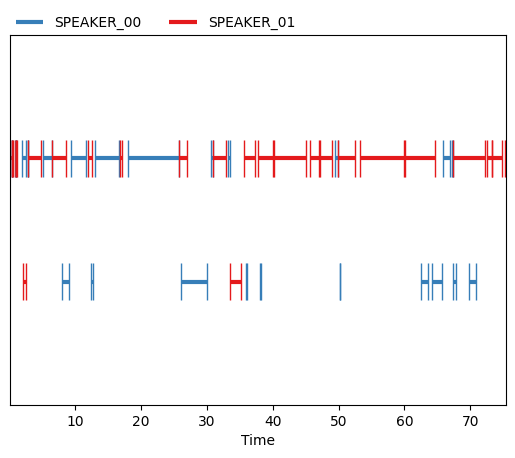

In [ ]:
import matplotlib.pyplot as plt
from pyannote.core import notebook

notebook.plot_annotation(combined_annotation, time=True, legend=True)
plt.show()


In [ ]:
from transformers import pipeline

transcriber = pipeline("automatic-speech-recognition",model="openai/whisper-large-v3",chunk_length_s=30)
transcriber(AUDIO_FILE )

config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

{'text': " Hello Puneet Ji, how are you? Hey, hi Utkarsh. How are you? I'm doing good. Everything is going well. Great. Utkarsh, I wanted to check with you. It's been a while we gave the app, Salesman, for Ikshit to use. Was he able to use it? Did you see any benefit? No, Puneet Ji, to be very honest, we are running an offline campaign. Okay. The leads that will come in that, from March 1st week, or April 1st week, we are thinking to manage with the app. अब हमारा प्रति नहीं है अब हमारा �ने का कि लीज मैनेजमेंट के लिए कुछ तो चाहिए तो मैंने अपनी जिन आप देख रखा है वह यूज कर लेंगे गॉट गॉट तो मैं तब आपको पूरा रिव्यू देता हूं आपका अपनी साइड से भी देखो ना हमारे इतना यूज हुआ नहीं है कि अब सब ना कैमपेइन पूरा डिफाइन करना में लगेगी कि क्या क्या किसकी करें तो वह ट्रैंड टू कम तो बिकॉज ना वह पाइलेट अभी क्लोस कर रहा है सब जिस वह टू मेक शुरू कि आगर वी साट यूजिंग और वीकेट लेकर नो नो वी है फिर वी वी वी वी � So I just want to make sure that either we start using or we can like... No, no, we have. We will 

In [ ]:
 # Transcribe the audio file without translating
transcription = model.transcribe(AUDIO_FILE, task="transcribe")

# Print the transcription
transcription['text']

" Hello Puneet ji kaala. Hey I had kush. Brother, what do you have? Or good area or what things are there? Brother, it's up, brother. Great, great. Uttkush, I wanted to check with you. It's been a while we gave the app salesman. Yes, it's shit to use. Yes, it was able to use it. Did you see any benefit? No, now Puneet ji to be very honest, Abhinavar campaign is going off. Okay. So, in the use of our leads, I'll go to the first week or April 1st week. We are thinking to manage with the app because it will make our life work easier. Okay. So, we would be able to test the potential of the app. Because if you don't go home, you won't be able to keep the app in the campaign. Okay. So, we asked the leads and management to do something. But I'll see Puneet ji to use it. Got it. Got it. So, I'll give you a complete review of this app. You can see on your side too. We haven't used it yet. Because we all have to define the campaign. What will we do? Correct. That is what I was trying to come to 

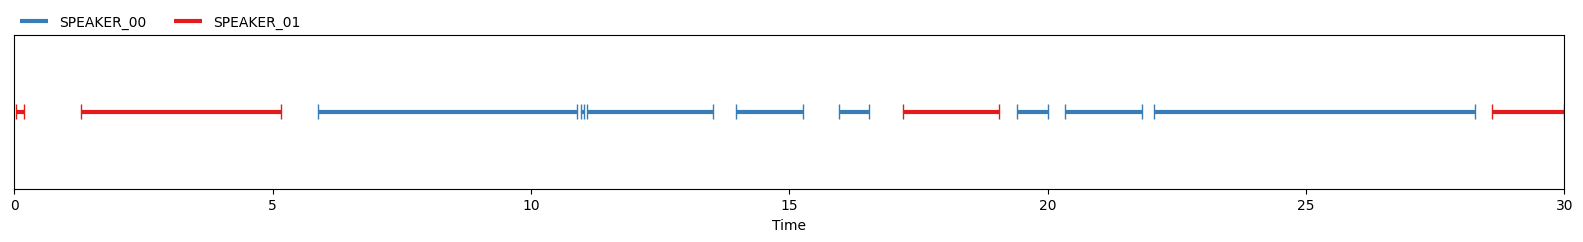

In [ ]:
# we visualize [0, 30] time range
from pyannote.core import notebook, Segment
notebook.crop = Segment(0, 30)
combined annotation


In [ ]:
# print the result
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")

start=0.0s stop=0.2s speaker_SPEAKER_01
start=1.3s stop=5.2s speaker_SPEAKER_01
start=5.9s stop=10.9s speaker_SPEAKER_00
start=11.0s stop=11.0s speaker_SPEAKER_00
start=11.1s stop=13.5s speaker_SPEAKER_00
start=14.0s stop=15.3s speaker_SPEAKER_00
start=16.0s stop=16.5s speaker_SPEAKER_00
start=17.2s stop=19.0s speaker_SPEAKER_01
start=19.4s stop=20.0s speaker_SPEAKER_00
start=20.3s stop=21.8s speaker_SPEAKER_00
start=22.1s stop=28.3s speaker_SPEAKER_00
start=28.6s stop=30.6s speaker_SPEAKER_01
